# Machine Learning - Lifecycle

## Package Load

In [1]:
import re
import time
import random
import warnings
import platform
import numpy as np
import pandas as pd

import scipy.stats as stats

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, cross_validate, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, RocCurveDisplay, roc_auc_score, auc

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [3]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import PolynomialFeatures

In [4]:
warnings.filterwarnings('ignore')

In [5]:
if platform.system()=='Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system()=='Linux':
    # !wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
    # !mv malgun.ttf /usr/share/fonts/truetype/
    import matplotlib.font_manager as fm
    fm._rebuild()
    plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False # minus 폰트 깨짐 해결

## First Simple ML
- 데이터 확인 (EDA) -> 데이터 분할 -> 전처리 -> 모델학습 -> 성능평가 (검증/튜닝)

### (1) Classification

#### Iris dataset

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [7]:
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [8]:
x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

In [9]:
# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행 
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=11)

In [10]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행. 
pred = dt_clf.predict(x_test)

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


In [11]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
### cross_val_score
# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 3개 
scores = cross_val_score(dt_clf , iris_data, iris_label , scoring='accuracy',cv=3)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.92 0.98]
평균 검증 정확도: 0.96


In [13]:
### GridSearchCV
# parameter들을 dictionary 형태로 설정
parameters = {'max_depth':[1, 2, 3], 'min_samples_split':[2, 3]}

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default. True이면 가장 좋은 파라미터 설정으로 재 학습.  
grid_dtree = GridSearchCV(dt_clf, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(x_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.675000,5,0.675,0.675,0.675
1,"{'max_depth': 1, 'min_samples_split': 3}",0.675000,5,0.675,0.675,0.675
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.000,0.950
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.000,0.950
4,"{'max_depth': 3, 'min_samples_split': 2}",0.966667,1,0.925,1.000,0.975
5,"{'max_depth': 3, 'min_samples_split': 3}",0.966667,1,0.925,1.000,0.975


In [14]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9667


In [15]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(x_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9333


#### Titanic dataset

In [16]:
titanic_df = pd.read_csv('./pymlrev2-main/1장/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [17]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
y_titanic_df = titanic_df['Survived']
x_titanic_df= titanic_df.drop('Survived', axis=1)

# fill NA
x_titanic_df['Age'].fillna(x_titanic_df['Age'].mean(), inplace=True)
x_titanic_df['Cabin'].fillna('N', inplace=True)
x_titanic_df['Embarked'].fillna('N', inplace=True)
x_titanic_df['Fare'].fillna(0, inplace=True)

# 머신러닝 알고리즘에 불필요한 피처 제거
x_titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Label encoding
x_titanic_df['Cabin'] = x_titanic_df['Cabin'].str[:1]
for feature in ['Cabin', 'Sex', 'Embarked']:
    le = LabelEncoder()
    le = le.fit(x_titanic_df[feature])
    x_titanic_df[feature] = le.transform(x_titanic_df[feature])

In [18]:
# data split
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [20]:
# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear') # 작은 데이터에서 유리한 solver

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8659


In [21]:
# KFold
def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count, (train_index, test_index) in enumerate(kfold.split(x_titanic_df)):
        # x_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        x_train, x_test = x_titanic_df.values[train_index], x_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(x_train, y_train) 
        predictions = clf.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 

exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [22]:
# cross_val_score
scores = cross_val_score(dt_clf, x_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
    
print("평균 정확도: {0:.4f}".format(np.mean(scores))) 

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


### (2) Regression

#### Boston dataset

In [23]:
boston = pd.read_csv('./data/housing.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [24]:
boston.shape

(506, 14)

In [25]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [26]:
boston.isna().sum() # no NAs

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

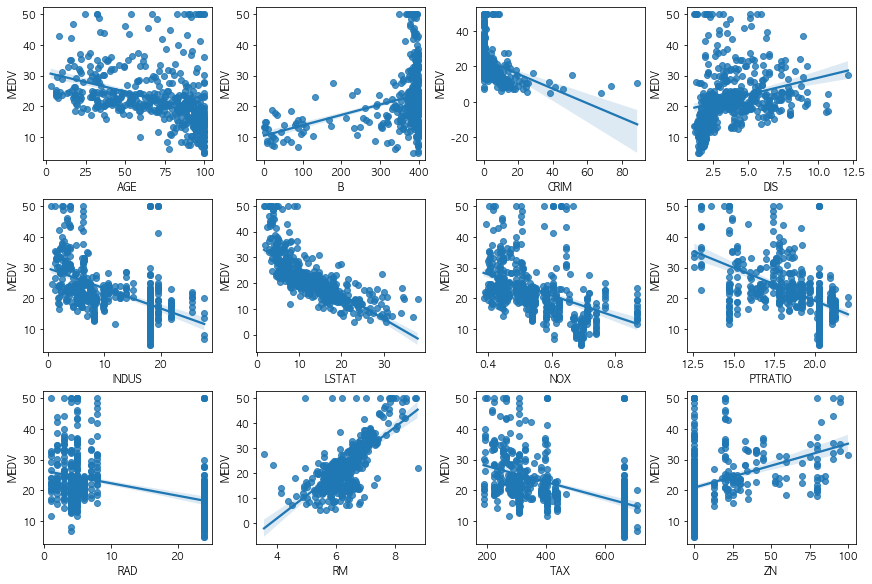

In [27]:
fig, axs = plt.subplots(figsize=(12, 8), ncols=4, nrows=3, constrained_layout=True) # 3개의 행과 4개의 열을 가진 subplot
features = boston.columns.difference(['MEDV', 'CHAS'])

for i, feature in zip(range(12), features):
    row = i//4 # 행번호 설정
    col = i%4 # 열번호 설정
    
    # seaborn의 regplot을 이용해 산점도와 선형 회귀직선을 함께 시각화
    sns.regplot(x=feature, y=boston['MEDV'], data=boston, ax=axs[row][col])

In [28]:
### Data split
x = boston[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']].values
y = boston['MEDV'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
print('학습데이터세트 PRICE 평균: ', y_train.mean())
print('평가데이터세트 PRICE 평균: ', y_test.mean())

학습데이터세트 PRICE 평균:  22.796534653465343
평가데이터세트 PRICE 평균:  21.488235294117644


In [30]:
### Scaling
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
### Modeling
linear = LinearRegression()
linear.fit(x_train_scaled, y_train)

LinearRegression()

In [33]:
### Model evaluation
x_test_scaled = scaler.transform(x_test)
pred = linear.predict(x_test_scaled)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('R2-Score: {0: .5f}'.format(r2))

MAE:  3.23724
MSE:  24.63539
R2-Score:  0.66406


In [34]:
pred_df = pd.DataFrame(pred, columns=['pred Price'])
actual = pd.DataFrame(y_test, columns=['actual Price'])

reg_result = pd.concat([actual, pred_df], axis=1)
reg_result.head()

,actual Price,pred Price
0,23.6,29.218660
1,32.4,33.551467
2,13.6,14.810658
3,22.8,25.084725
4,16.1,19.173927


In [35]:
print('절편 값:', linear.intercept_)
print('회귀 계수값:', np.round(linear.coef_, 1))

절편 값: 24.866842302745077
회귀 계수값: [-10.6   3.2   1.6  -7.9  22.1  -0.5 -16.1   6.6  -6.3  -8.9   5.1 -19. ]


In [36]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 칼럼명에 유의
coeff = pd.Series(data=np.round(linear.coef_, 1), index=features)
coeff.sort_values(ascending=False)

INDUS      22.1
PTRATIO     6.6
TAX         5.1
B           3.2
CRIM        1.6
LSTAT      -0.5
RAD        -6.3
DIS        -7.9
RM         -8.9
AGE       -10.6
NOX       -16.1
ZN        -19.0
dtype: float64

In [37]:
# cross_val_score()로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시 RMSE 구함. 
neg_mse_scores = cross_val_score(LinearRegression(), x, y, scoring="neg_mean_squared_error", cv=5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print('5 folds 의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores: [-12.67 -24.28 -27.84 -82.08 -36.51]
5 folds 의 개별 RMSE scores: [3.56 4.93 5.28 9.06 6.04]
5 folds 의 평균 RMSE: 5.773


## Hyperparameter Optimization

### (1) Grid Search
- 모든 가능한 조합을 수행

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [39]:
parameters = {'max_depth': [2, 3, 5, 10], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(x_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


### (2) Randomized Search
- 특정 범위에서 파라미터를 랜덤으로 선택

In [40]:
param_distribs = {'max_depth': [2, 3, 5, 10], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 8]}
rand_dclf = RandomizedSearchCV(dt_clf, param_distributions=param_distribs, n_iter=5, cv=5, scoring='accuracy')
rand_dclf.fit(x_train, y_train)

print('RandomizedSearch 최적 하이퍼 파라미터:', rand_dclf.best_params_)
print('RandomizedSearch 최고 정확도: {0:.4f}'.format(rand_dclf.best_score_))
best_dclf = rand_dclf.best_estimator_

# RandomizedSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

RandomizedSearch 최적 하이퍼 파라미터: {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 3}
RandomizedSearch 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


### (3) Bayesian Optimization

In [41]:
# !pip install hyperopt
from hyperopt import hp
from hyperopt import STATUS_OK
from hyperopt import fmin, tpe, Trials

In [42]:
# -10 ~ 10까지 1간격을 가지는 입력 변수 x와 -15 ~ 15까지 1간격으로 입력 변수 y 설정.
search_space = {'x': hp.quniform('x', -10, 10, 1), 'y': hp.quniform('y', -15, 15, 1)}

In [43]:
# 목적 함수 생성. 변숫값과 변수 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정 값을 반환
def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y
    
    return retval

In [44]:
# 입력 결괏값을 저장한 Trials 객체값 생성.
trial_val = Trials()

# 목적 함수의 최솟값을 반환하는 최적 입력 변숫값을 5번의 입력값 시도(max_evals=5)로 찾아냄.
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5, trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_01)

100%|███████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 400.87trial/s, best loss: -224.0]
best: {'x': -4.0, 'y': 12.0}


In [45]:
trial_val = Trials()

# max_evals를 20회로 늘려서 재테스트
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20, trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_02)

100%|█████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 548.26trial/s, best loss: -296.0]
best: {'x': 2.0, 'y': 15.0}


In [46]:
# fmin()에 인자로 들어가는 Trials 객체의 result 속성에 파이썬 리스트로 목적 함수 반환값들이 저장됨
# 리스트 내부의 개별 원소는 {'loss':함수 반환값, 'status':반환 상태값} 와 같은 딕셔너리임. 
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


In [47]:
# Trials 객체의 vals 속성에 {'입력변수명':개별 수행 시마다 입력된 값 리스트} 형태로 저장됨.
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0, 2.0, -2.0, -4.0, 7.0, -0.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0, 3.0, -14.0, -8.0, 11.0, -0.0]}


In [48]:
# results에서 loss 키값에 해당하는 밸류들을 추출하여 list로 생성. 
losses = [loss_dict['loss'] for loss_dict in trial_val.results]

# DataFrame으로 생성.
result_df = pd.DataFrame({'x': trial_val.vals['x'], 'y': trial_val.vals['y'], 'losses': losses})
result_df.head()

,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0


## Model Evaluation

### (1) Classification
- Accuracy: 정답의 개수. 데이터 구성에 따라 성능이 왜곡될 가능성 있음
- Confusion Matrix: Accuray의 한계점 보완
- Precision, Recall: Positive 예측에 집중한 지표. Positive 중 실제 Positive 비율 / 실제 Positive 중 예측된 Positive 비율
- F1-score: Precision, Recall의 조화평균
- ROC curve, AUC: FPR(False Positive Rate) 대비 TPR(True Positive Rate)의 변화와 그 비율을 판단
- Gain chart, Lift chart
    - 이익(Gain): 목표 범주에 속하는 개체들이 각 등급에 얼마나 분포하고 있는지 나타냄
    - 향상도(Lift): 랜덤 모델 대비 얼마나 모델의 성과가 얼마나 있는지 등급별로 파악

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [50]:
### Accuracy
accuracy_score(y_test, lr_pred)

0.8659217877094972

In [51]:
### Confusion matrix
confusion_matrix(y_test, lr_pred)

array([[108,  10],
       [ 14,  47]])

In [52]:
### Precision
precision_score(y_test, lr_pred)

0.8245614035087719

In [53]:
### Recall
recall_score(y_test, lr_pred)

0.7704918032786885

In [54]:
### Precision & Recall, trade-offs
# predict_proba()
pred_proba = lr_clf.predict_proba(x_test)
pred = lr_clf.predict(x_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.44935225 0.55064775]
 [0.86335511 0.13664489]
 [0.86429643 0.13570357]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935225 0.55064775 1.        ]
 [0.86335511 0.13664489 0.        ]
 [0.86429643 0.13570357 0.        ]]


In [55]:
from sklearn.preprocessing import Binarizer

In [56]:
### Binarizer: 확률 값을 label 값으로 변경해 줌. np.where을 대신 써도 무방
# threshold 설정값 = 분류 결정 임곗값 
custom_threshold = 0.5

# predict_proba() 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

confusion = confusion_matrix(y_test, custom_predict)
accuracy = accuracy_score(y_test, custom_predict)
precision = precision_score(y_test, custom_predict)
recall = recall_score(y_test, custom_predict)
print('오차 행렬\n', confusion)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

오차 행렬
 [[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [57]:
# Binarizer의 threshold 설정값을 0.4로 설정
custom_threshold = 0.4

pred_proba_1 = pred_proba[:,1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

confusion = confusion_matrix(y_test, custom_predict)
accuracy = accuracy_score(y_test, custom_predict)
precision = precision_score(y_test, custom_predict)
recall = recall_score(y_test, custom_predict)
print('오차 행렬\n', confusion)
print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

오차 행렬
 [[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


In [58]:
pred_proba_c1 = pred_proba[:, 1].reshape(-1, 1)

for custom_threshold in [0.4, 0.45, 0.50, 0.55, 0.60]:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값:', custom_threshold)
    
    confusion = confusion_matrix(y_test, custom_predict)
    accuracy = accuracy_score(y_test, custom_predict)
    precision = precision_score(y_test, custom_predict)
    recall = recall_score(y_test, custom_predict)
    print('오차 행렬\n', confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

임곗값: 0.4
오차 행렬
 [[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임곗값: 0.45
오차 행렬
 [[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869
임곗값: 0.5
오차 행렬
 [[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
임곗값: 0.55
오차 행렬
 [[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377
임곗값: 0.6
오차 행렬
 [[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213


In [59]:
### precision_recall_curve
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(x_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (147,)
반환된 precisions 배열의 Shape: (148,)
반환된 recalls 배열의 Shape: (148,)
thresholds 5 sample: [0.11573102 0.11636722 0.11819212 0.12102774 0.1234948 ]
precisions 5 sample: [0.37888199 0.375      0.37735849 0.37974684 0.38216561]
recalls 5 sample: [1.         0.98360656 0.98360656 0.98360656 0.98360656]
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
샘플 임계값별 정밀도:  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


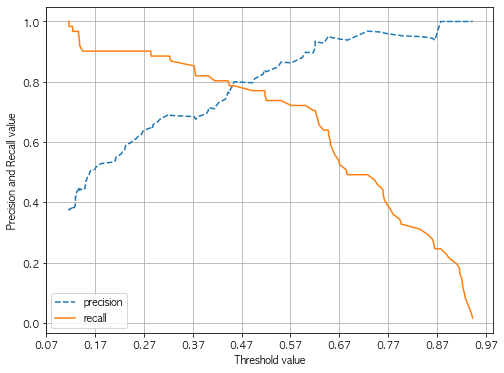

In [60]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    sns.lineplot(x=thresholds, y=precisions[0:threshold_boundary], linestyle='dashed', label='precision')
    sns.lineplot(x=thresholds, y=recalls[0:threshold_boundary], label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(x_test)[:, 1])

In [61]:
### f1-score
f1_score(y_test , pred)

0.7966101694915254

In [62]:
pred_proba = lr_clf.predict_proba(x_test)
pred_proba_c1 = pred_proba[:, 1].reshape(-1, 1)
for custom_threshold in [0.4, 0.45, 0.50, 0.55, 0.60]:
    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값:', custom_threshold)

    confusion = confusion_matrix(y_test, custom_predict)
    accuracy = accuracy_score(y_test, custom_predict)
    precision = precision_score(y_test, custom_predict)
    recall = recall_score(y_test, custom_predict)
    f1 = f1_score(y_test, custom_predict)
    
    print('오차 행렬\n', confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

임곗값: 0.4
오차 행렬
 [[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1:0.7576
임곗값: 0.45
오차 행렬
 [[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1:0.7869
임곗값: 0.5
오차 행렬
 [[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1:0.7966
임곗값: 0.55
오차 행렬
 [[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1:0.7965
임곗값: 0.6
오차 행렬
 [[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1:0.8000


In [63]:
### ROC & AUC
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(x_test)[:, 1] 

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출. 
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값:  [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


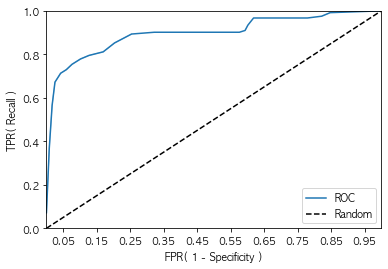

In [64]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)

    sns.lineplot(x=fprs, y=tprs, ci=False, label='ROC')
    sns.lineplot(x=[0, 1], y=[0, 1], color='black', linestyle='dashed', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Specificity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(x_test)[:, 1])

In [65]:
pred_proba = lr_clf.predict_proba(x_test)[:, 1]
roc_auc_score(y_test, pred_proba)

0.8986524034454015

In [66]:
# Class가 명확하게 정의된 데이터에서만 가능
### Gain table generate
def get_gain_table(clf, X, y, num_group=10):
    res_df = pd.DataFrame()
    res_df['response'] = y
    class_idx = np.where(clf.classes_==1)[0][0]
    
    res_df['prob'] = clf.predict_proba(X)[:, class_idx]
    res_df = res_df.sort_values('prob', ascending=False).reset_index(drop=True) ## 확률값으로 내림차순
    res_df['temp'] = range(len(res_df))
    labels = list(range(1, num_group+1))
    res_df['group'] = pd.qcut(res_df['temp'], num_group, labels = labels) ## 데이터 num_group 수만큼 분할
    res_df = res_df.groupby('group').agg({'response': ['sum', 'count']}).reset_index() ## 
    res_df.columns = ['group','num_of_response', 'num_of_data']
    res_df = res_df.sort_values('group')
    res_df['individual_gain'] = res_df['num_of_response']/np.sum(y) ## 구간별 gain
    res_df['gain'] = res_df['individual_gain'].cumsum() ## gain
    
    return res_df

### Lift table generate
def get_lift_table(clf, X, y, num_group=10):
    res_df = pd.DataFrame()
    res_df['response'] = y
    class_idx = np.where(clf.classes_==1)[0][0]
    res_df['prob'] = clf.predict_proba(X)[:, class_idx]
    res_df = res_df.sort_values('prob', ascending=False).reset_index(drop=True) ## 확률값으로 내림차순
    res_df['temp'] = range(len(res_df))
    labels = list(range(1, num_group+1))
    res_df['group'] = pd.qcut(res_df['temp'], num_group, labels = labels) ## 데이터 num_group 수만큼 분할
    res_df = res_df.groupby('group').agg({'response': ['sum', 'count', 'mean']}).reset_index() ## 
    res_df.columns = ['group','num_of_response', 'num_of_data', 'response_rate']
    res_df = res_df.sort_values('group')
    baseline_lift = np.sum(y)/len(y)
    res_df['lift'] = res_df['response_rate']/baseline_lift ## 구간별 gain
    
    return res_df

In [67]:
gain_df = get_gain_table(lr_clf, x_test, y_test)
gain_df

,group,num_of_response,num_of_data,individual_gain,gain
0,1,17,18,0.278689,0.278689
1,2,17,18,0.278689,0.557377
2,3,11,18,0.180328,0.737705
3,4,5,18,0.081967,0.819672
4,5,5,18,0.081967,0.901639
5,6,0,17,0.000000,0.901639
6,7,0,18,0.000000,0.901639
7,8,4,18,0.065574,0.967213
8,9,2,18,0.032787,1.000000
9,10,0,18,0.000000,1.000000


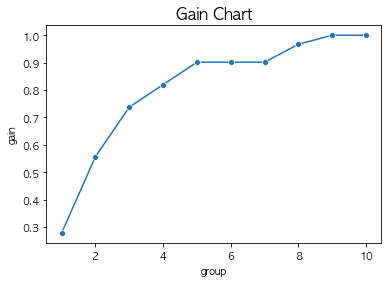

In [68]:
sns.lineplot(x=gain_df['group'], y=gain_df['gain'], marker='o')

plt.title('Gain Chart', fontsize=16)
plt.show()

In [69]:
lift_df = get_lift_table(lr_clf, x_test, y_test)
lift_df

,group,num_of_response,num_of_data,response_rate,lift
0,1,17,18,0.944444,2.771403
1,2,17,18,0.944444,2.771403
2,3,11,18,0.611111,1.793260
3,4,5,18,0.277778,0.815118
4,5,5,18,0.277778,0.815118
5,6,0,17,0.000000,0.000000
6,7,0,18,0.000000,0.000000
7,8,4,18,0.222222,0.652095
8,9,2,18,0.111111,0.326047
9,10,0,18,0.000000,0.000000


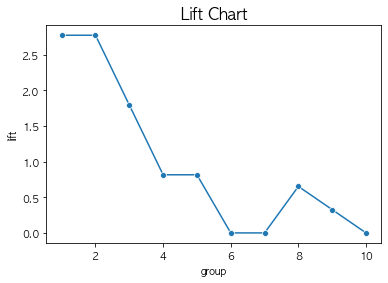

In [70]:
sns.lineplot(x=lift_df['group'], y=lift_df['lift'], marker='o')
plt.title('Lift Chart', fontsize=16)
plt.show()

### (2) Regression
- MAE(Mean Absolute Error): 에러 크기 그대로 반영. 이상치 영향 받음
- MSE(Mean Squared Error): 에러의 면적합. 이상치 영향 받음
- RMSE(Root Mean Squared Error)
- MSLE(Mean Squared Log Error)
- MAPE(Mean Absolute Percentage Error): 오차가 예측값에서 차지하는 정도
- R-square: 데이터에 대한 모델의 설명 정도. 높을 수록 좋음

In [71]:
x = boston[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']].values
y = boston['MEDV'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_test_scaled = scaler.transform(x_test)
pred = linear.predict(x_test_scaled)

In [72]:
def MAPE(y_test, y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test)) * 100
    return mape

In [73]:
### MAE
mean_absolute_error(y_test, pred)

3.237242361814496

In [74]:
### MSE / RMSE
# squared option으로 조정
mean_squared_error(y_test, pred, squared=False) # RMSE

4.96340549989364

In [75]:
### MAPE
MAPE(y_test, pred)

17.33983667687901

In [76]:
### R-square
r2_score(y_test, pred)

0.664064867586112

In [77]:
# mean_squared_log_error(y_test, pred)
# msle는 positive 변수일때만 사용 가능

## ML Pipeline - Regression

In [78]:
housing = pd.read_csv('./handson-ml2/datasets/housing/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Data split
- 소득 별로 분할하여 Stratified split
- x, y split

In [79]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train = housing.loc[train_index]
    strat_test = housing.loc[test_index]
    
for set_ in (strat_train, strat_test):
    set_.drop("income_cat", axis=1, inplace=True)

In [80]:
### split X, y
housing = strat_train.drop("median_house_value", axis=1)
housing_labels = strat_train["median_house_value"].copy()

### Pipeline class

In [81]:
num_attribs = list(housing.columns.difference(["ocean_proximity"]))
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([ # compose
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

### Modeling

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [83]:
### Modeling
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [84]:
### validation
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_mse # train set으로 검증하여 overfitting

0.0

In [85]:
### Random Forest
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
print('Random Forest RMSE:', forest_rmse)

### SVRegressor
svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
print('SVR RMSE:', np.sqrt(svm_rmse))

Random Forest RMSE: 18354.32660078079
SVR RMSE: 334.3690761684062


In [86]:
### Pipeline with modeling
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(housing)

array([ 88983.14806384, 305351.35385026, 153334.71183453, ...,
       221487.30785916, 241041.31494299, 100662.66960931])

### Model save & load

In [87]:
import joblib

In [88]:
### model save
# joblib.dump(full_pipeline_with_predictor, "my_model.pkl")

In [89]:
# model load
# my_model_loaded = joblib.load("my_model.pkl")

### Cross validation

In [90]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

print('Tree model')
score = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=3)
tree_rmse_scores = np.sqrt(-score) # error의 경우 부호를 반대로 해야 함
display_scores(tree_rmse_scores)

print('\nLinear Regression model')
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=3)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

print('\nRandom Forest model')
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=3)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

print('\nSVR model')
svr_scores = cross_val_score(svm_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=3)
svr_rmse_scores = np.sqrt(-svr_scores)
display_scores(svr_rmse_scores)

Tree model
점수: [69849.95776875 69185.54836148 70489.07564732]
평균: 69841.52725918274
표준 편차: 532.1961739470247

Linear Regression model
점수: [68499.93941627 70177.76265488 69201.23113026]
평균: 69292.97773380253
표준 편차: 688.0338094636624

Random Forest model
점수: [49823.0556125  50532.45470069 51183.65349122]
평균: 50513.05460147205
표준 편차: 555.6311245051338

SVR model
점수: [112649.49881834 114393.2710437  115034.92596079]
평균: 114025.89860760847
표준 편차: 1007.8979918917704


### HPO

In [91]:
### Grid search
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, # 12(=3×4)개의 하이퍼파라미터 조합을 시도합니다.
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}] # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도합니다.

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=3, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [92]:
print('best params:', grid_search.best_params_)
print('best estimator:', grid_search.best_estimator_)

best params: {'max_features': 8, 'n_estimators': 30}
best estimator: RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)


In [93]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params) # Grid search 점수 확인

63450.32381122495 {'max_features': 2, 'n_estimators': 3}
55928.62717586398 {'max_features': 2, 'n_estimators': 10}
53602.05766014793 {'max_features': 2, 'n_estimators': 30}
60274.67681804967 {'max_features': 4, 'n_estimators': 3}
53181.17799369876 {'max_features': 4, 'n_estimators': 10}
51088.77876908601 {'max_features': 4, 'n_estimators': 30}
61202.48392403287 {'max_features': 6, 'n_estimators': 3}
53165.830387170696 {'max_features': 6, 'n_estimators': 10}
50853.83092128557 {'max_features': 6, 'n_estimators': 30}
60352.1421257307 {'max_features': 8, 'n_estimators': 3}
52746.277456108925 {'max_features': 8, 'n_estimators': 10}
50727.14790838459 {'max_features': 8, 'n_estimators': 30}
62813.005687821016 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54973.79417527878 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60619.70682327377 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53622.092899649375 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [94]:
### Randomized search
param_distribs = {'n_estimators': np.random.randint(low=1, high=200, size=10),
                  'max_features': np.random.randint(low=1, high=8, size=10)}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': array([1, 4, 1, 4, 6, 2, 7, 2, 5, 7]),
                                        'n_estimators': array([ 89,  76,  86,  42, 190, 186, 160, 118, 134, 191])},
                   random_state=42, scoring='neg_mean_squared_error')

In [95]:
from scipy.stats import randint
from scipy.stats import geom, expon

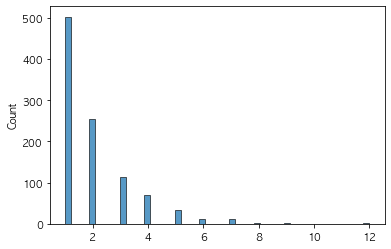

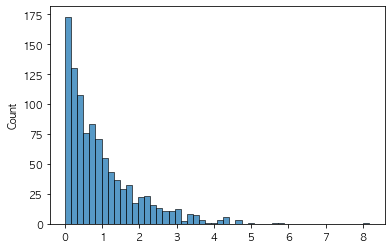

In [96]:
### geom, exponential parameters
geom_distrib = geom(0.5).rvs(1000, random_state=42)
expon_distrib = expon(scale=1).rvs(1000, random_state=42)

sns.histplot(geom_distrib, bins=50)
plt.show()
sns.histplot(expon_distrib, bins=50)
plt.show()

In [97]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

50399.07388517163 {'n_estimators': 42, 'max_features': 5}
53151.49924606481 {'n_estimators': 42, 'max_features': 2}
52500.17992637956 {'n_estimators': 89, 'max_features': 2}
49790.8700008532 {'n_estimators': 186, 'max_features': 6}
49783.103660502886 {'n_estimators': 190, 'max_features': 6}
50126.67179647642 {'n_estimators': 191, 'max_features': 4}
54534.37226514882 {'n_estimators': 86, 'max_features': 1}
49832.77852609296 {'n_estimators': 89, 'max_features': 5}
50394.004875777195 {'n_estimators': 89, 'max_features': 4}
54493.35800093847 {'n_estimators': 89, 'max_features': 1}


### Best model, Feature importance

In [98]:
feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.4499147620859369, 'median_income'),
 (0.1401204552927923, 'pop_per_hhold'),
 (0.11308431493871018, 'longitude'),
 (0.10100077376373191, 'latitude'),
 (0.04900351622597163, 'housing_median_age'),
 (0.038638281268360365, 'population'),
 (0.030800756442082574, 'total_rooms'),
 (0.028466395086199844, 'total_bedrooms'),
 (0.02585907088468502, 'households'),
 (0.011619867281741325, 'rooms_per_hhold'),
 (0.009239103399093158, 'INLAND'),
 (0.00218027514438822, '<1H OCEAN'),
 (7.242818630655396e-05, 'bedrooms_per_room')]

### Test model

In [99]:
### Test set 사용
final_model = grid_search.best_estimator_

x_test = strat_test.drop("median_house_value", axis=1)
y_test = strat_test["median_house_value"].copy()

x_test_prepared = full_pipeline.transform(x_test)
final_predictions = final_model.predict(x_test_prepared)

print(mean_squared_error(y_test, final_predictions, squared=False))

47766.34153125065


In [100]:
# 95% CI for Test RMSE
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
print(np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, loc=squared_errors.mean(), scale=stats.sem(squared_errors))))

# z-score
mean = squared_errors.mean()
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(len(squared_errors))
print(np.sqrt(mean - zmargin), np.sqrt(mean + zmargin))

[45847.46771481 49611.05190076]
45848.04225163724 49610.52094316534


## ML Pipeline - Classification

In [101]:
from sklearn.datasets import fetch_openml

In [102]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

x, y = mnist["data"], mnist["target"]
print(x.shape, y.shape)

(70000, 784) (70000,)


In [103]:
# y type 변환
y = y.astype(np.uint8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

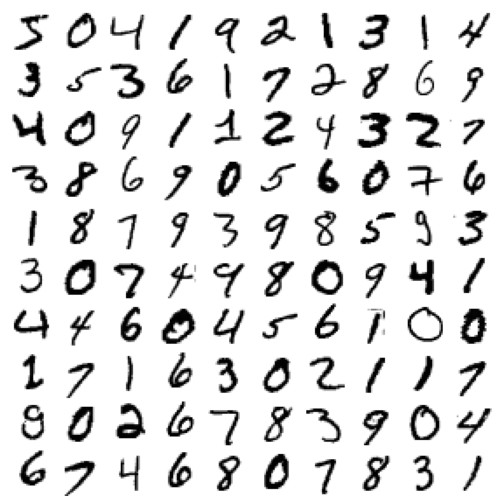

In [104]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

# 숫자 그림을 위한 추가 함수
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # n_rows = ceil(len(instances) / images_per_row) 와 동일합니다.
    n_rows = (len(instances) - 1) // images_per_row + 1

    # 필요하면 그리드 끝을 채우기 위해 빈 이미지를 추가합니다:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # 배열의 크기를 바꾸어 28×28 이미지를 담은 그리드로 구성합니다:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # 축 0(이미지 그리드의 수직축)과 2(이미지의 수직축)를 합치고 축 1과 3(두 수평축)을 합칩니다. 
    # 먼저 transpose()를 사용해 결합하려는 축을 옆으로 이동한 다음 합칩니다:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size, images_per_row * size)
    # 하나의 큰 이미지를 얻었으므로 출력하면 됩니다.
    plt.imshow(big_image, cmap=mpl.cm.binary, **options)
    plt.axis("off")
    
plt.figure(figsize=(9, 9))
example_images = x[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

### Data split

In [105]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [106]:
### Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))

### Modeling - Binary

In [107]:
### Biranry case로 변경
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [108]:
from sklearn.linear_model import SGDClassifier

In [109]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(x_train_scaled, y_train_5)

SGDClassifier(random_state=42)

### Cross validation

In [110]:
cross_val_score(sgd_clf, x_train_scaled, y_train_5, cv=3, scoring="accuracy") ### 아래의 Base model과 비교 필요

array([0.9713 , 0.9669 , 0.96785])

In [111]:
from sklearn.base import BaseEstimator

In [112]:
### Base model
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train_scaled, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

### Evaluation

In [113]:
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train_5, cv=3)

In [114]:
confusion_matrix(y_train_5, y_train_pred)

array([[53931,   648],
       [ 1231,  4190]])

In [115]:
print("Precision:", precision_score(y_train_5, y_train_pred))
print("Recall:", recall_score(y_train_5, y_train_pred))
print("F1-score:", f1_score(y_train_5, y_train_pred))

Precision: 0.8660603555188094
Recall: 0.7729201254381111
F1-score: 0.8168437469538942


In [116]:
### score 추출
y_scores = cross_val_predict(sgd_clf, x_train_scaled, y_train_5, cv=3, method="decision_function")

In [117]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

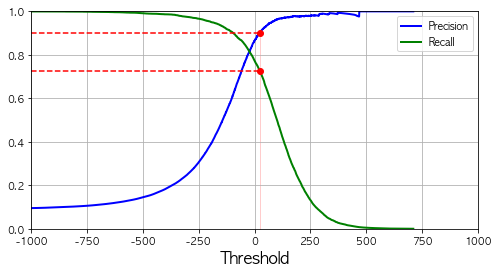

In [118]:
# 90% precision 목표
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.figure(figsize=(8, 4))
sns.lineplot(x=thresholds, y=precisions[:-1], color='blue', label="Precision", linewidth=2)
sns.lineplot(x=thresholds, y=recalls[:-1], color='green', label="Recall", linewidth=2)
plt.legend(loc="center right", fontsize=16)
plt.xlabel("Threshold", fontsize=16)
plt.axis([-1000, 1000, 0, 1])   
plt.grid(True) 

sns.lineplot(x=[threshold_90_precision, threshold_90_precision], y=[0., 0.9], color='red', linestyle='dashed')
sns.lineplot(x=[-1000, threshold_90_precision], y=[0.9, 0.9], color='red', linestyle='dashed') 
sns.lineplot(x=[-1000, threshold_90_precision], y=[recall_90_precision, recall_90_precision], color='red', linestyle='dashed')
sns.lineplot(x=[threshold_90_precision], y=[0.9], color='red', linestyle='dashed')
plt.plot([threshold_90_precision], [0.9], "ro")
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
plt.show()

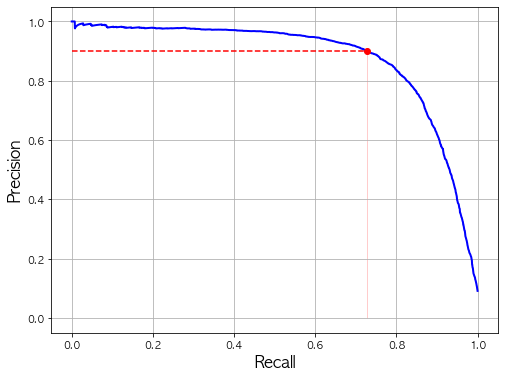

In [119]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=recalls, y=precisions, color="blue", linewidth=2)
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.grid(True)
    
sns.lineplot(x=[recall_90_precision, recall_90_precision], y=[0., 0.9], color='red', linestyle='dashed')
sns.lineplot(x=[0.0, recall_90_precision], y=[0.9, 0.9], color='red', linestyle='dashed')
sns.lineplot(x=[recall_90_precision], y=[0.9], color='red', linestyle='dashed')
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

In [120]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

22.472524841848383

In [121]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

print("Precision:", precision_score(y_train_5, y_train_pred_90))
print("Recall:", recall_score(y_train_5, y_train_pred_90))
print("F1-score:", f1_score(y_train_5, y_train_pred_90))

Precision: 0.9000456412596988
Recall: 0.7275410440878067
F1-score: 0.804651637253902


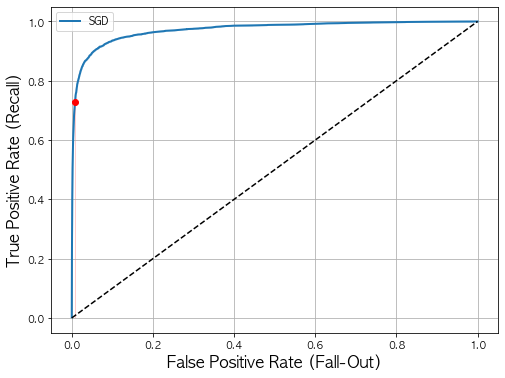

AUC: 0.9726681225154626


In [122]:
### ROC curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

plt.figure(figsize=(8, 6)) 
sns.lineplot(x=fpr, y=tpr, linewidth=2, label='SGD')
sns.lineplot(x=[0, 1], y=[0, 1], color='black', linestyle='dashed') # 대각 점선
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.grid(True)

fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]

sns.lineplot(x=[fpr_90, fpr_90], y=[0., recall_90_precision], color='red', linestyle='dashed')
sns.lineplot(x=[0.0, fpr_90], y=[recall_90_precision, recall_90_precision], color='red', linestyle='dashed')
plt.plot([fpr_90], [recall_90_precision], "ro")  
plt.show()

print('AUC:', roc_auc_score(y_train_5, y_scores))

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
### Add classifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [125]:
y_train_pred_forest = cross_val_predict(forest_clf, x_train_scaled, y_train_5, cv=3)

print("Precision:", precision_score(y_train_5, y_train_pred_forest))
print("Recall:", recall_score(y_train_5, y_train_pred_forest))
print("F1-score:", f1_score(y_train_5, y_train_pred_forest))

Precision: 0.9905083315756169
Recall: 0.8662608374838591
F1-score: 0.9242275142688446


In [126]:
y_probas_forest = cross_val_predict(forest_clf, x_train_scaled, y_train_5, cv=3, method="predict_proba")

y_scores_forest = y_probas_forest[:, 1] # 점수 = 양성 클래스의 확률
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
print('AUC:', roc_auc_score(y_train_5, y_scores_forest))

AUC: 0.9983414120257013


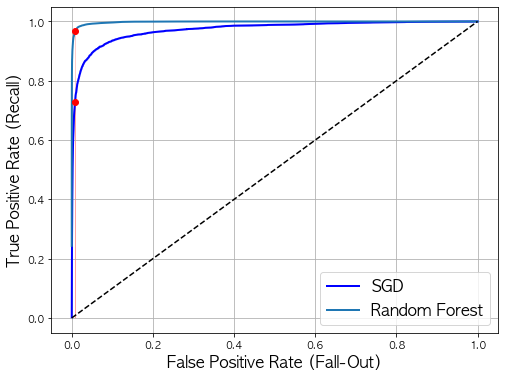

In [127]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr, color='blue', linewidth=2, label="SGD")
sns.lineplot(x=fpr_forest, y=tpr_forest, linewidth=2, label="Random Forest")
sns.lineplot(x=[0, 1], y=[0, 1], color='black', linestyle='dashed') # 대각 점선
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.grid(True)
    
sns.lineplot(x=[fpr_90, fpr_90], y=[0., recall_90_precision], color='red', linestyle='dashed')
sns.lineplot(x=[0.0, fpr_90], y=[recall_90_precision, recall_90_precision], color='red', linestyle='dashed')
plt.plot([fpr_90], [recall_90_precision], "ro")
sns.lineplot(x=[fpr_90, fpr_90], y=[0., recall_for_forest], color='red', linestyle='dashed')
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

### Modeling - Multiclass
- OvR (One-versus-the-rest): 분류 시 가장 높은 결정 점수를 클래스로 결정
- OvO (One-versus-one): 각 조합마다 이진 분류기 훈련
    - Logistic Regression, SVClassifier 등 이진 분류만 가능한 알고리즘
    - Train set의 크기에 영향을 많이 받는 알고리즘 (SVClassifier)

In [128]:
from sklearn.svm import SVC

In [129]:
svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(x_train_scaled[:1000], y_train[:1000])

SVC(gamma='auto', random_state=42)

In [130]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [131]:
from sklearn.multiclass import OneVsRestClassifier

In [132]:
### OvO 또는 OvR 강제
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(x_train[:1000], y_train[:1000])

OneVsRestClassifier(estimator=SVC(gamma='auto', random_state=42))

In [133]:
len(ovr_clf.estimators_)

10

### Classification errors
- Class 값으로 예측값이 주어지지 않는 경우가 있어, 데이터 변형이 필요할 수 있음

In [134]:
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

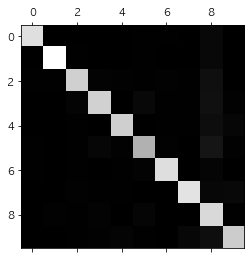

In [135]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

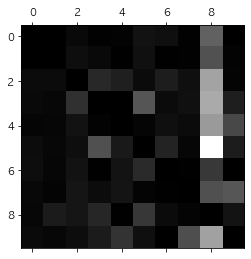

In [136]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

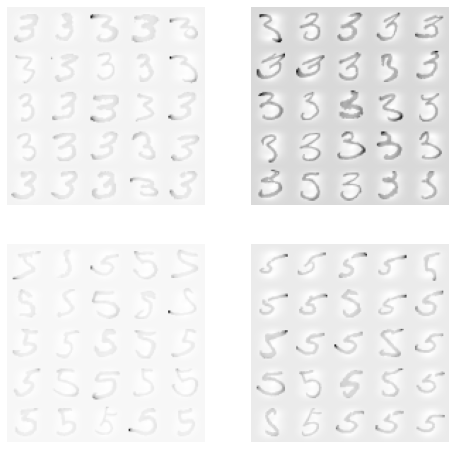

In [137]:
cl_a, cl_b = 3, 5
x_aa = x_train_scaled[(y_train==cl_a) & (y_train_pred==cl_a)]
x_ab = x_train_scaled[(y_train==cl_a) & (y_train_pred==cl_b)]
x_ba = x_train_scaled[(y_train==cl_b) & (y_train_pred==cl_a)]
x_bb = x_train_scaled[(y_train==cl_b) & (y_train_pred==cl_b)]

plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(x_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(x_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(x_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(x_bb[:25], images_per_row=5)
plt.show()

### Averaging F1 score
- Micro-Averaging (마이크로 평균)
    - 각 클래스의 TP, FP, FN을 모두 더해 전체적으로 하나의 큰 confusion matrix를 생성
    - Precision과 Recall을 이 confusion matrix에 대해 계산한 후 F1 스코어 계산
    - 모든 클래스의 예측과 실제 값들을 하나로 합쳐서 계산하기 때문에, 클래스 간 밸런스가 중요하지 않은 경우에 유용
    - 클래스 간 샘플 수 밸런스가 필요 없으며, 모든 클래스를 하나의 큰 클래스로 취급하기 때문에 클래스 빈도에 영향을 덜 받음
    - 이진 분류에서와 마찬가지로 모든 예측과 실제값을 묶어서 계산하기 때문에, 데이터의 전체적인 성능을 확인할 수 있음
    - 클래스 간 불균형이 심한 경우에는 작은 클래스의 성능이 무시될 수 있으며, 클래스 크기가 다른 경우 각 클래스의 중요도를 반영하지 않음
- Macro-Averaging (매크로 평균)
    - 각 클래스 별로 따로 Precision과 Recall을 계산한 후, 모든 클래스의 평균 계산
    - 클래스 간 밸런스가 중요한 경우 사용됨
    - 각 클래스의 F1 스코어가 동등한 가중치를 갖게 됨
    - 각 클래스 별로 독립적으로 평가하므로, 클래스 간 밸런스가 중요한 경우에 적합하며, 모든 클래스의 성능을 동등하게 취급하여 중요한 클래스의 성능도 고려함
    - 클래스 간 샘플 수 밸런스가 불균형한 경우, 큰 클래스가 평균에 미치는 영향이 더 크게 나타날 수 있고 클래스 크기에 상관없이 동등한 가중치를 부여하기 때문에 작은 클래스의 성능이 상대적으로 중요한 경우에는 적절하지 않음
- Weighted-Averaging (가중 평균)
    - 클래스 별로 Precision과 Recall을 계산한 후, 각 클래스의 샘플 수를 기반으로 가중 평균 계산
    - 클래스 간 밸런스가 중요하면서 각 클래스가 다른 샘플 수를 가지는 경우에 사용
    - 클래스별로 F1 스코어를 가중하여 전체적인 성능 평가
    - 클래스 별로 샘플 수에 따라 가중치를 부여하기 때문에 클래스 간 샘플 수 및 중요도를 모두 고려할 수 있고 클래스 간 밸런스와 각 클래스의 중요도가 동시에 고려되므로 다양한 상황에 적용 가능함
    - 클래스 간 샘플 수가 크게 불균형한 경우, 작은 클래스의 성능이 무시될 수 있음. 또한 클래스 크기와 중요도를 고려하면서도, 작은 클래스의 성능을 충분히 평가하는 방법을 선택하는 것이 중요함

In [138]:
f1 = f1_score(y_train, y_train_pred, average='weighted')

### Multi-label classification
- 하나의 케이스가 여러 label을 갖는 경우

In [139]:
from sklearn.neighbors import KNeighborsClassifier

In [140]:
# 두 가지 label 생성
y_train_large = (y_train >= 7)
y_train_odd = (y_train%2 == 1)

y_multilabel = np.c_[y_train_large, y_train_odd]

In [141]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

In [142]:
y_train_knn_pred = cross_val_predict(knn_clf, x_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro") # 불균형 클래스의 경우, average="weighted"

0.976410265560605

### Multi-output classification
- Multi-label에서, label이 Multiclass의 성질을 갖는 것

In [143]:
noise = np.random.randint(0, 100, (len(x_train), 784))
x_train_mod = x_train + noise
noise = np.random.randint(0, 100, (len(x_test), 784))
x_test_mod = x_test + noise

y_train_mod = x_train
y_test_mod = x_test

In [144]:
knn_clf.fit(x_train_mod, y_train_mod)
clean_digit = knn_clf.predict([x_test_mod[2]])